# Understanding Regression Output
---

The goal of this notebook is to understand each piece of a regression output. We will go through each ouput from an example OLS MLR model from housing data. 

In order, we will cover:
 - R-squared
 - Adjusted R-squared
 - Degrees of Freedom
 - F statistic
 - Probability of the F statistic
 - Constant Coefficient
 - Beta Coefficients
 - Standard Error
 - t-value
 - p-value
 - Confidence Intervals
 
 

## Libraries and Data

In [1]:
import pandas as pd
import statsmodels.api as sm

data = 'hprice1.dta'
df = pd.read_stata(data)
df.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


## MLR Model

$price = \beta_0 + \beta_1 (bdrms) + \beta_2 (llotsize) + \beta_3 (lsqrft) + \epsilon$

In [2]:
X = df[['bdrms','llotsize','lsqrft']]
Y = df['price']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     58.90
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.34e-20
Time:                        14:23:29   Log-Likelihood:                -482.14
No. Observations:                  88   AIC:                             972.3
Df Residuals:                      84   BIC:                             982.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2026.4171    209.336     -9.680      0.000   -2442.705   -1610.129
bdrms         19.3506      8.849      2.187      0.032       1.753      36.948
llotsize      61.4571     12.304      4.995      0.000      36.988      85.926
lsqrft       224.9734     29.849      7.537      0.000     165.616     284.331
==============================================================================
Omnibus:                       23.166   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.448
Skew:                           1.051   Prob(JB):                     2.72e-09
Kurtosis:                       5.517   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis of Variance (ANOVA)
The ANOVA section provides a comprehensive summary of how well our regression model fits the housing price data and whether the predictor variables are collectively significant in explaining the variation in the dependent variable `price`.
 

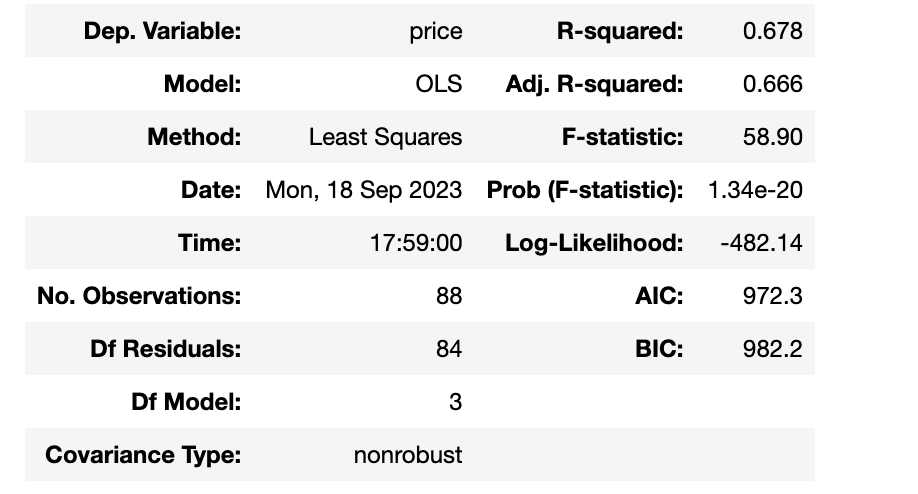

### R-squared
This is a measure of the proportion of the total variability in the dependent variable that is explained by the model.

- In our case, it implies 67.8% of the variation in `price` is explained by `bdrms`, `llotsize`, and `lsqrft`. 

$R^2 = 0$ means that none of the variability in the dependent variable is explained by the model, and the model is a poor fit.

$R^2 = 1$ means that all of the variability in the dependent variable is explained by the model, and the model is a perfect fit.

### Adj. R-squared
$R^2$ has a limitation: it tends to increase as you add more predictor variables to the model, even if those variables do not significantly improve the model's explanatory power. This can lead to overfitting, where the model fits the sample data very well but may not generalize well to new, unseen data.

Adjusted $R^2$ adjusts the $R^2$ value based on the number of predictor variables in the model. It takes into account the concept of degrees of freedom with the goal of encouraging the selection of models that are parsimonious (not overly complex) while still explaining a substantial portion of the variability in the dependent variable.

 - In our case, adj. r-squared is slightly less than r squared impplying that some of the additional independent variables may not be contributing to explaining the variation in `price`.

#### Important Note on Adj. R-Squared:
*Linear regression exhibits a particular behavior where the R-squared value of your model tends to remain the same or increase when you add more variables, even if some of these variables contribute poorly to the model. This can create a misleading impression of accuracy, as the R-squared may appear higher with multiple variables, regardless of their real impact. The adjusted R-squared, however, addresses this by adjusting the R-squared based on the number of variables in the model. Consequently, a lower adjusted R-squared score can serve as an indication that certain variables are not effectively enhancing your model's R-squared value, suggesting their limited contribution.*

### Degrees of Freedom (regression context)
The degrees of Freedom represent the number of independent pieces of information available in a statistical analysis while accounting for constraints or conditions.
 
Degrees of freedom for the residuals or DF residuals are (N - 1 - DFM), representing the unexplained variation in the dependent variable.

- In our case, DF residuals = (No. observations) - 1 - (DF Model) = $88 - 1 - 3 = 84$

### F-Statistic
The F-statistic is used to compare the performance of a  linear model, which includes your variables, with a simplified model where the effects of your variables are set to zero. This comparison helps you determine if your group of variables collectively holds statistical significance in explaining the variation in the dependent variable. To correctly interpret the F-statistic, it's essential to select a predefined significance level (alpha) and refer to an F-table for guidance.

 - In our case, the F-statistic does not have that much relevance because our model has only a few independent variables. For us its more important to look at the prob(f-stat) or just look at the coefficients, which will come after the ANOVA section.

### Prob(F-Statistic)
This tells the overall significance of the regression. This is to assess the significance level of **all the variables together** unlike the t-statistic that measures it for individual variables.

$H_0: \beta_1 = \beta_2 = \beta_3 = 0$,

Prob(F-statistic) depicts the probability of null hypothesis being true. 
 - In our case, the probability associated with the F-statistic is equal to $1.34 \times 10^{-20}$. This value is exceptionally minuscule, almost indistinguishable from zero. Such a tiny probability strongly suggests that the regression analysis has significant meaning and provides valuable insights.
 - And, of course, it means we have very strong evidence to reject the null hypothesis, indicating that at least one independent variable has a statistically significant effect in our regression.

## Coefficients Table
The Coefficients table is essential for understanding the relationships between the independent variables and the dependent variable in your regression model. It help assess which independent variables have a statistically significant impact on the outcome and provides information about the magnitude and direction of those effects.

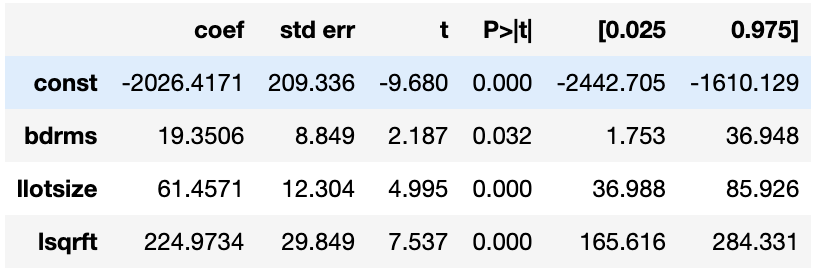

### Constant Coefficient
The coefficient estimate for the `Const` term represents the predicted or estimated value of the dependent variable when all independent variables are set to zero. It is the intercept of the regression line with the y-axis.
 - In our case, our regression intercepts with the y axis at about -2000 (-\$2,000,000) 
 - This represents $\beta_0$ in our MLR equation

### Beta Coefficients
These coefficients represent the relationship between **each independent variable** and the dependent variable in the regression model. The coefficient of an independent variable quantifies the strength and direction of the relationship between that particular independent variable and the dependent variable. It tells you how much the dependent variable is expected to change for a one-unit change in the independent variable, holding all other variables constant.

#### Interpretation and Magnitude:
**Positive Coefficient**: If the coefficient is positive, it indicates a positive relationship between the independent variable and the dependent variable. In other words, as the independent variable increases, the dependent variable is expected to increase as well.

**Negative Coefficient**: If the coefficient is negative, it indicates a negative relationship between the independent variable and the dependent variable. As the independent variable increases, the dependent variable is expected to decrease.

**Magnitude**: The magnitude of the coefficient is also essential. A larger absolute value (farther from zero) suggests a stronger relationship between the variables. For example, a coefficient of 3 indicates a stronger effect than a coefficient of 0.5.

--- 

Note our original MLR equation: 

$price = \beta_0 + \beta_1 (bdrms) + \beta_2 (llotsize) + \beta_3 (lsqrft) + \epsilon$.

Lets describe one of our beta coefficients:

- `bdrms` coefficient: $\beta_1 = 19.35$, implying that for each additional bedroom, the price is expected to increase by 19.35 (19.35*1000 = $19,350)


### Standard Error (SE) of Coefficients
The SE of a coefficient is a measure of the variability or uncertainty associated with the estimated value of that coefficient. It quantifies how much the coefficient is likely to vary from one sample to another if you were to repeatedly collect data from the same population.

**Interpretation**: A smaller SE indicates that the coefficient estimate is more precise and has less variability, while a larger standard error suggests that the estimate is less precise and has more variability. This allows you to compare the relative precision of different coefficients.

**Hypothesis Testing**: SEs are used to calculate t-statistics and p-values for each coefficient. The t-statistic is computed by dividing the coefficient estimate by its standard error. The p-value associated with the t-statistic helps determine whether the coefficient is statistically significant.

- In our case, for example, the SE for `bdrms` is the smallest of the independent variables suggesting that it is the most precise of the 3.


### t Value
The t-value, also known as the t-statistic, is a measure of how many standard errors the estimated coefficient is away from zero. It quantifies the significance of the coefficient, indicating whether it is likely to be different from zero (i.e., whether it has a significant effect on the dependent variable).

A larger absolute t-value indicates a more significant effect of the independent variable on the dependent variable.

The sign of the t-value (positive or negative) tells you the direction of the effect (positive or negative relationship).

### P>|t| or p-value
The P>|t| value, often denoted as p-value, represents the probability that the observed t-value (or one more extreme) would occur by random chance alone, assuming that the true coefficient is zero (null hypothesis)

A small p-value (typically less than 0.05) indicates that the coefficient is statistically significant. In other words, it suggests that the effect of the independent variable on the dependent variable is unlikely to be due to random chance.

A large p-value (greater than 0.05) suggests that the coefficient is not statistically significant. This means there is insufficient evidence to conclude that the independent variable has a significant effect on the dependent variable.

### Confidence Interval (0.025 and 0.975)
These values represent the lower and upper bounds of a confidence interval for each coefficient. They provide a range within which you can be reasonably confident that the true population coefficient lies.

 - for example, our `bdrms` coefficient estimate is 16 and our confidence interval for `bdrms` is (1.7, 36). This indicates that we can be 95% confident that, for the whole housing market, the **coefficient** on the number of bedrooms will be between 1.7 and 36.